In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.image as mpimg
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

In [30]:
size  = 150
channels = 3
batch = 128
epochs = 15

In [31]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)

datagenValidation = ImageDataGenerator(rescale=1./255)

In [32]:
Model = tf.keras.models.load_model('F:/dogs_vs_cats/best_model.hdf5')

In [36]:
filenames = os.listdir("F:/test")
df_test = pd.DataFrame({'Image':filenames})
df_test

,Image
0,cf.1.jpg
1,cf.10.jpg
2,cf.11.jpg
3,cf.12.jpg
4,cf.13.jpg
5,cf.14.jpg
6,cf.15.jpg
7,cf.16.jpg
8,cf.17.jpg
9,cf.18.jpg


In [37]:
X_test = datagenValidation.flow_from_dataframe(
    df_test, 
    directory="F:/test", 
    x_col='Image',
    y_col=None,
    class_mode=None,
    target_size= (size,size),
    batch_size=batch,
    shuffle=False
)

Found 20 validated image filenames.


In [38]:
y_pred = Model.predict(X_test)

In [39]:
y_pred = np.where(y_pred > .5, "Dog", "Cat")
y_pred

array([['Dog'],
       ['Dog'],
       ['Dog'],
       ['Dog'],
       ['Dog'],
       ['Cat'],
       ['Cat'],
       ['Dog'],
       ['Cat'],
       ['Cat'],
       ['Dog'],
       ['Dog'],
       ['Cat'],
       ['Dog'],
       ['Cat'],
       ['Cat'],
       ['Cat'],
       ['Dog'],
       ['Dog'],
       ['Dog']], dtype='<U3')

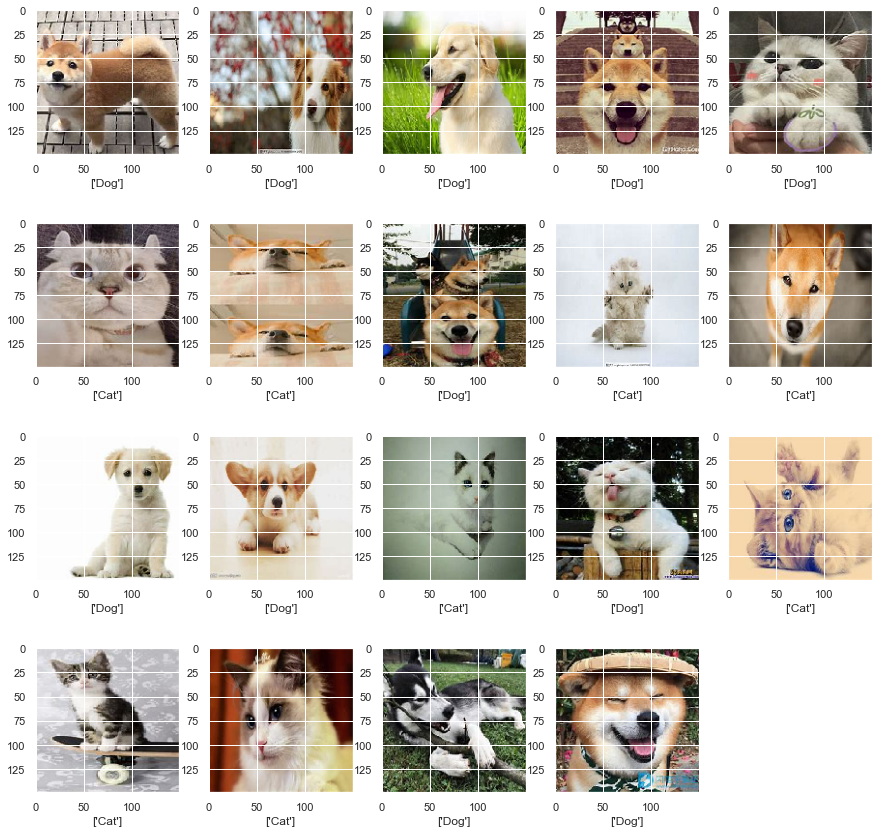

In [41]:
plt.figure(figsize=(15,15))
for i in range(19):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[0][i])
    plt.xlabel(y_pred[i])
    
plt.show()